In [244]:
 %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_ride = pd.read_csv(r'C:\Users\omar.aziz\Desktop\Rice Data Analytics\ride_data.csv')
df_city = pd.read_csv(r'C:\Users\omar.aziz\Desktop\Rice Data Analytics\city_data.csv')

combined_df = pd.merge(df_ride, df_city, how='left', on='city')
combined_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [245]:
dd = combined_df.groupby(['city','driver_count','type'],as_index=False).agg(lambda x : x.sum() if x.dtype=='float64' else ' '.join(x)) #Total number of drivers and city type

df1 = combined_df.groupby(['city']).aggregate('mean') #average fare per city
df2 = combined_df.groupby(['city']).aggregate('count') #total rides per city

dd2 = dd.drop(['date','fare'], axis=1)
df11 = df1.drop(['ride_id','driver_count'], axis=1)
df22 = df2.drop(['date','fare','driver_count','type'], axis=1)

# dfpop100 = pd.merge(dfpop11,dfpop22, on="Item ID")

f1_df = pd.merge(dd2,df11, on="city")
final_df = pd.merge(f1_df,df22, on="city")

final_df.columns = ['City','Driver Count','City Type','Average Fare','Total Rides']

final_df.head()

,City,Driver Count,City Type,Average Fare,Total Rides
0,Amandaburgh,12,Urban,24.641667,18
1,Barajasview,26,Urban,25.332273,22
2,Barronchester,11,Suburban,36.422500,16
3,Bethanyland,22,Suburban,32.956111,18
4,Bradshawfurt,7,Rural,40.064000,10


In [246]:
#creating lists
city = final_df['City'].values.tolist()
driver_count = final_df['Driver Count'].values.tolist()
city_type = final_df['City Type'].values.tolist()
average_fare = final_df['Average Fare'].values.tolist()
total_rides = final_df['Total Rides'].values.tolist()

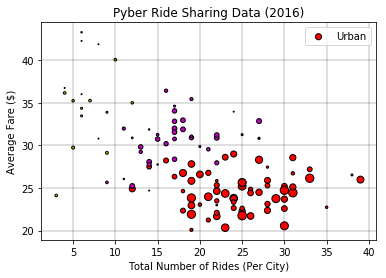

In [247]:
fig, ax = plt.subplots()

colors = {'Urban':'r','Suburban':'m','Rural':'y'}

categories = final_df['City Type'].apply(lambda x: colors[x])

ax.scatter(total_rides, average_fare, marker="o", s=driver_count, edgecolors = 'black', c=final_df['City Type'].apply(lambda x: colors[x]))
ax.legend(categories.unique())
ax.set_title("Pyber Ride Sharing Data (2016)")
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.grid(color='black', linestyle='-', linewidth=0.25)


ax.legend(['Urban'])

#plt.scatter(total_rides, average_fare, marker="o", s=driver_count,  c= colors, edgecolors = "black")

#add gridlines
#ax.grid(color='black', linestyle='-',linewidth=0.5, alpha=0.5)




plt.show()

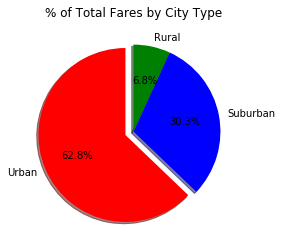

In [248]:
#Total Fares by City Type

Filter_Urb = final_df['City Type'] == 'Urban'
Filter_Sub = final_df['City Type'] == 'Suburban'
Filter_Rur = final_df['City Type'] == 'Rural'

Urb = final_df[Filter_Urb]['Total Rides'].sum()
Sub = final_df[Filter_Sub]['Total Rides'].sum()
Rur = final_df[Filter_Rur]['Total Rides'].sum()

urban_count = final_df[Filter_Urb]['Average Fare'].mean()*Urb
sub_count = final_df[Filter_Sub]['Average Fare'].mean()*Sub
rur_count = final_df[Filter_Rur]['Average Fare'].mean()*Rur

x = [urban_count,sub_count,rur_count]


label=["Urban","Suburban","Rural"]
colors2 = ["red","blue","green"]
explode = (0.1,0,0)

plt.title("% of Total Fares by City Type")
plt.pie(x, explode=explode, labels=label, colors=colors2, autopct="%1.1f%%", shadow=True, startangle=90)

plt.show()

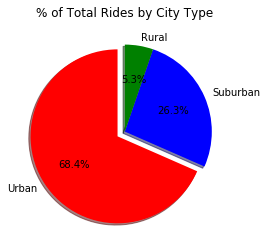

In [249]:
#Total Rides by City Type

Filter_Urb = final_df['City Type'] == 'Urban'
Filter_Sub = final_df['City Type'] == 'Suburban'
Filter_Rur = final_df['City Type'] == 'Rural'

urban_count = final_df[Filter_Urb]['Total Rides'].sum()
sub_count = final_df[Filter_Sub]['Total Rides'].sum()
rur_count = final_df[Filter_Rur]['Total Rides'].sum()

x = [urban_count,sub_count,rur_count]


label=["Urban","Suburban","Rural"]
colors2 = ["red","blue","green"]
explode = (0.1,0,0)

plt.title("% of Total Rides by City Type")
plt.pie(x, explode=explode, labels=label, colors=colors2, autopct="%1.1f%%", shadow=True, startangle=90)

plt.show()

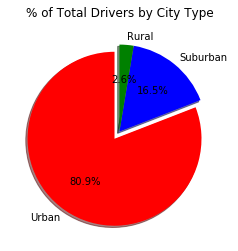

In [250]:
#Total Drivers by City Type

urban_count = final_df[Filter_Urb]['Driver Count'].sum()
sub_count = final_df[Filter_Sub]['Driver Count'].sum()
rur_count = final_df[Filter_Rur]['Driver Count'].sum()

x = [urban_count,sub_count,rur_count]


label=["Urban","Suburban","Rural"]
colors2 = ["red","blue","green"]
explode = (0.1,0,0)

plt.title("% of Total Drivers by City Type")
plt.pie(x, explode=explode, labels=label, colors=colors2, autopct="%1.1f%%", shadow=True, startangle=90)

plt.show()


In [ ]:
# THREE OBSERVABLE TRENDS:
    #1) There are proportionally more drivers in Urban city types than any other city type. 
    #2) Even with 80.9% of total drivers being in Urban city type, only about 62.8% of the revenue is generated by the Urban drivers
    #3) Rural and Suburban areas tend to have the larger average fares, compared to Urban areas. 